In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

In [44]:
# 1️⃣ Load the processed dataset
train_df = pd.read_csv("../data/train_processed.csv")
test_df = pd.read_csv("../data/test_processed.csv")

In [45]:
# 2️⃣ Split into features (X) and target (y)
X = train_df.drop(columns=["income"])
y = train_df["income"]

In [46]:
# 3️⃣ Train-validation split (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
# 4️⃣ Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# 5️⃣ Evaluate the model
y_val_pred = rf_model.predict(X_val)
balanced_acc = balanced_accuracy_score(y_val, y_val_pred)
print(f"✅ Model Trained! Balanced Accuracy: {balanced_acc:.4f}")

✅ Model Trained! Balanced Accuracy: 0.7697


In [49]:
# 6️⃣ Make predictions on test data
test_predictions = rf_model.predict(test_df)

In [50]:
# 7️⃣ Save predictions for submission
submission_file = "../submissions/submission_census_income_sharif_yjmejy.csv"
np.savetxt(submission_file, test_predictions, fmt="%d")

In [51]:
print(f"✅ Predictions saved to: {submission_file}")

✅ Predictions saved to: ../submissions/submission_census_income_sharif_yjmejy.csv


In [52]:
import numpy as np

submission_file = "../submissions/submission_census_income_sharif_yjmejy.csv"
predictions = np.loadtxt(submission_file, dtype=int)

print("✅ Submission file loaded successfully!")
print("Unique values in submission file:",
      np.unique(predictions))  # Should be [0, 1]
print("Total predictions:", len(predictions))

✅ Submission file loaded successfully!
Unique values in submission file: [0 1]
Total predictions: 2400


In [53]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf node
}



In [54]:

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

In [55]:
# Grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5,
                           scoring='balanced_accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='balanced_accuracy')

In [56]:
# Best model
best_rf = grid_search.best_estimator_

In [57]:
# Evaluate on validation data
y_val_pred = best_rf.predict(X_val)
balanced_acc = balanced_accuracy_score(y_val, y_val_pred)
print(
    f"✅ Best Random Forest Model Trained! Balanced Accuracy: {balanced_acc:.4f}")

✅ Best Random Forest Model Trained! Balanced Accuracy: 0.7724


In [58]:
# Check for missing values in features
print("Missing values in X before splitting:")
print(X.isnull().sum().sort_values(ascending=False))

Missing values in X before splitting:
sex                                     35
age                                      0
education.num                            0
capital.gain                             0
capital.loss                             0
hours.per.week                           0
workclass_local-gov                      0
workclass_never-worked                   0
workclass_private                        0
workclass_self-emp-inc                   0
workclass_self-emp-not-inc               0
workclass_state-gov                      0
workclass_unknown                        0
workclass_without-pay                    0
marital.status_married-af-spouse         0
marital.status_married-civ-spouse        0
marital.status_married-spouse-absent     0
marital.status_never-married             0
marital.status_separated                 0
marital.status_unknown                   0
marital.status_widowed                   0
occupation_armed-forces                  0
occupation_craft

In [59]:
# Fill missing values in 'sex' with the most frequent value (mode)
X_train["sex"] = X_train["sex"].fillna(X_train["sex"].mode()[0])
X_val["sex"] = X_val["sex"].fillna(X_val["sex"].mode()[0])

In [60]:
print("Missing values in X_train:")
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])

Missing values in X_train:
Series([], dtype: int64)


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(
    X_train)  # Fit & transform on training data
X_val_scaled = scaler.transform(X_val)  # Transform validation data

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_val_pred = log_reg.predict(X_val_scaled)
balanced_acc = balanced_accuracy_score(y_val, y_val_pred)
print(f"✅ Scaled Logistic Regression Balanced Accuracy: {balanced_acc:.4f}")

✅ Scaled Logistic Regression Balanced Accuracy: 0.7701


In [62]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=200, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

y_val_pred = gb_model.predict(X_val)
balanced_acc = balanced_accuracy_score(y_val, y_val_pred)
print(f"✅ Gradient Boosting Balanced Accuracy: {balanced_acc:.4f}")

✅ Gradient Boosting Balanced Accuracy: 0.7988


In [63]:
print("Missing values in test_df:")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])

Missing values in test_df:
sex    10
dtype: int64


In [64]:
# Fill missing values in 'sex' with the most frequent value (mode)
test_df["sex"] = test_df["sex"].fillna(test_df["sex"].mode()[0])
print("Final missing values in test_df:",
      test_df.isnull().sum().sum())  # Should print 0

Final missing values in test_df: 0


In [65]:
test_predictions = gb_model.predict(test_df)
np.savetxt("../submissions/submission_census_income_sharif_yjmejy.csv",
           test_predictions, fmt="%d")
print("✅ Gradient Boosting Predictions Saved!")

✅ Gradient Boosting Predictions Saved!


In [66]:
# Train Random Forest again
rf_model.fit(X_train, y_train)

# Now make predictions
test_predictions = rf_model.predict(test_df)

# Save predictions
np.savetxt("../submissions/submission_census_income_sharif_yjmejy.csv",
           test_predictions, fmt="%d")
print("✅ Random Forest Predictions Saved!")

✅ Random Forest Predictions Saved!


In [67]:
import numpy as np

submission_file = "../submissions/submission_census_income_sharif_yjmejy.csv"
predictions = np.loadtxt(submission_file, dtype=int)

print("Submission file loaded successfully!")
print("Unique values in submission file:",
      np.unique(predictions)) 
print("Total predictions:", len(predictions)) 

Submission file loaded successfully!
Unique values in submission file: [0 1]
Total predictions: 2400


In [68]:
import subprocess

# Export preprocessing.ipynb
subprocess.run(["jupyter", "nbconvert", "--to", "html",
               "../notebooks/preprocessing.ipynb"])

# Export modeling.ipynb
subprocess.run(["jupyter", "nbconvert", "--to",
               "html", "../notebooks/modeling.ipynb"])

print("Notebooks exported successfully!")

Notebooks exported successfully!


In [69]:
subprocess.run(["jupyter", "nbconvert", "--to", "pdf",
               "../notebooks/preprocessing.ipynb"])
subprocess.run(["jupyter", "nbconvert", "--to",
               "pdf", "../notebooks/modeling.ipynb"])

CompletedProcess(args=['jupyter', 'nbconvert', '--to', 'pdf', '../notebooks/modeling.ipynb'], returncode=1)

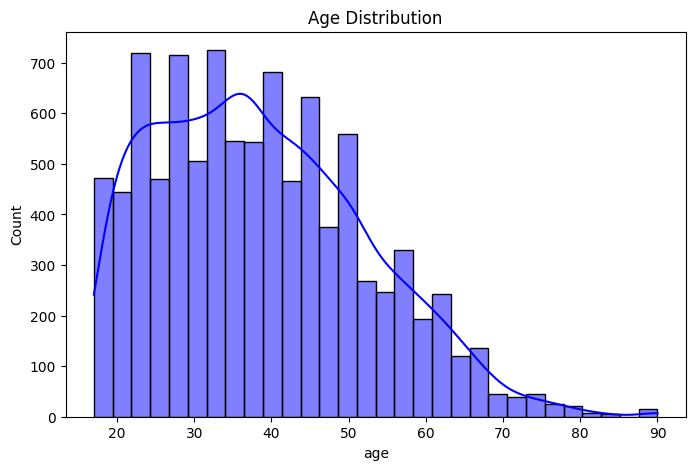

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot age distribution
plt.figure(figsize=(8, 5))
sns.histplot(train_df["age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()

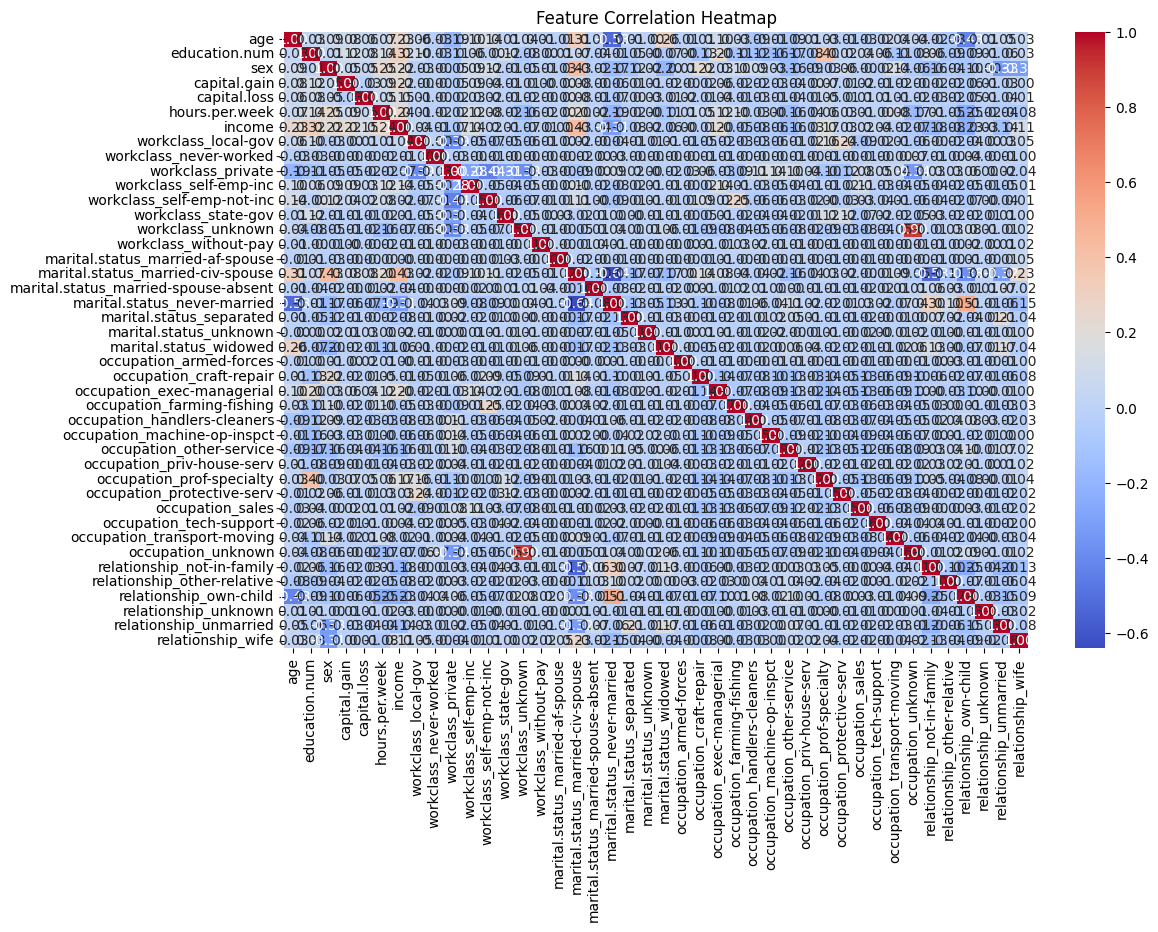

In [71]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

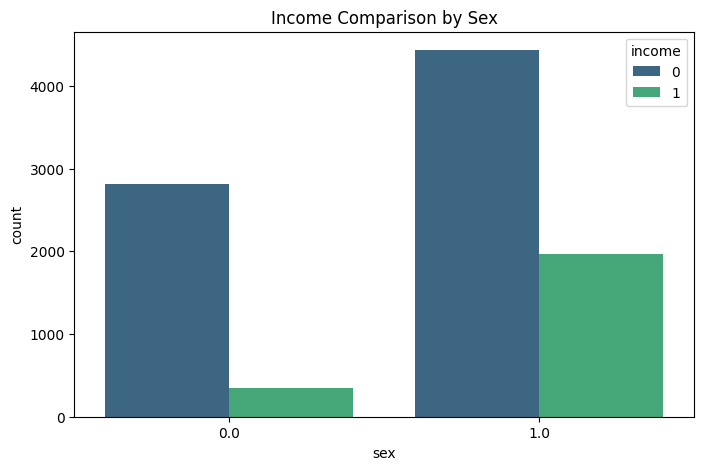

In [72]:
plt.figure(figsize=(8, 5))
sns.countplot(x="sex", hue="income", data=train_df, palette="viridis")
plt.title("Income Comparison by Sex")
plt.show()

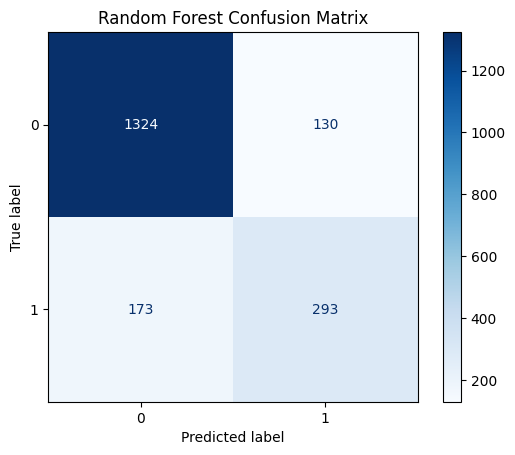

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predictions on validation set
y_val_pred = rf_model.predict(X_val)

# Create confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Display the matrix
disp.plot(cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()